<a href="https://colab.research.google.com/github/eomjimin/KDT_HW/blob/main/BPE_%26_WordPiece_Tokenizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BPE
- 1994년 제안된 정보 압축 알고리즘
- 데이터에서 가장 많이 등장한 문자열을 병합하여 데이터를 압축하는 기법
- 글자(character)단위에서 점차적으로 단어 집합(vocabulary)을 만들어내는 방식의 접근을 사용
- 토크나이즈 절차
  - 어휘 집합 구축: 자주 등장하는 문자열을 병합, 이를 어휘 집합에 추가, 이 과정을 원하는 어휘 집합 크기가 될 때까지 반복.
  - 토큰화: 토큰화 대상 문장 내 어절에서 어휘 집합에 있는 서브워드가 포함되어 있을 때 해당 서브워드를 어절에서 분리
  
  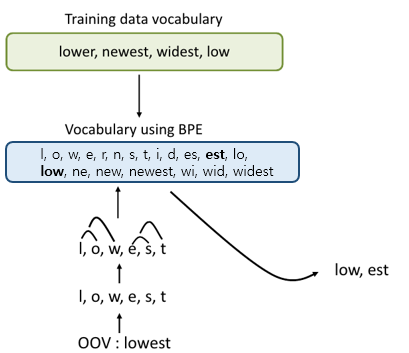

### 세부 절차
- BPE 알고리즘은 기본적으로 문장이 pre-tokenize 되어있다고 가정
1. 각 pre-tokenize로 나누어진 단어들의 빈도를 계산
2. 각 단어들을 하나의 글자(character)단위로 분할
3. 각 연속한 글자쌍들을 높은 빈도 순으로 병합
4. 병합된 쌍들을 포함하여 과정을 원하는 merge횟수 혹은 vocabulary size가 될 때까지 반복
  - vocabulary size = merge된 유니크한 토큰 + merge되지 않은 유니크한 character
5. 학습된 tokenizer를 활용해 새로운 데이터에 대해서도 tokenizing을 적용


### BPE 장단점
- 장점: 간단한 구조를 가지고 있고, 빠른 속도로 작동한다는 장점이 있다.
- 단점: pre-tokenizing을 가정하고 있기 때문에 띄어쓰기가 없는 중국어, 일본어 등의 언어에 대해서는 적용이 힘듦

### 예시 코드

In [1]:
import re, collections
from IPython.display import display, Markdown, Latex

In [2]:
num_merges = 10

dictionary = {'l o w </w>' : 5,
         'l o w e r </w>' : 2,
         'n e w e s t </w>':6,
         'w i d e s t </w>':3
         }

In [3]:
def get_stats(dictionary):
    # 유니그램의 pair들의 빈도수를 카운트
    pairs = collections.defaultdict(int)
    for word, freq in dictionary.items():
        symbols = word.split()
        for i in range(len(symbols)-1):
            pairs[symbols[i],symbols[i+1]] += freq
    print('현재 pair들의 빈도수 :', dict(pairs))
    return pairs

def merge_dictionary(pair, v_in):
    v_out = {}
    bigram = re.escape(' '.join(pair))
    p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')
    for word in v_in:
        w_out = p.sub(''.join(pair), word)
        v_out[w_out] = v_in[word]
    return v_out

bpe_codes = {}
bpe_codes_reverse = {}

for i in range(num_merges):
    display(Markdown("### Iteration {}".format(i + 1)))
    pairs = get_stats(dictionary)
    best = max(pairs, key=pairs.get)
    dictionary = merge_dictionary(best, dictionary)

    bpe_codes[best] = i
    bpe_codes_reverse[best[0] + best[1]] = best

    print("new merge: {}".format(best))
    print("dictionary: {}".format(dictionary))

### Iteration 1

현재 pair들의 빈도수 : {('l', 'o'): 7, ('o', 'w'): 7, ('w', '</w>'): 5, ('w', 'e'): 8, ('e', 'r'): 2, ('r', '</w>'): 2, ('n', 'e'): 6, ('e', 'w'): 6, ('e', 's'): 9, ('s', 't'): 9, ('t', '</w>'): 9, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'e'): 3}
new merge: ('e', 's')
dictionary: {'l o w </w>': 5, 'l o w e r </w>': 2, 'n e w es t </w>': 6, 'w i d es t </w>': 3}


### Iteration 2

현재 pair들의 빈도수 : {('l', 'o'): 7, ('o', 'w'): 7, ('w', '</w>'): 5, ('w', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('n', 'e'): 6, ('e', 'w'): 6, ('w', 'es'): 6, ('es', 't'): 9, ('t', '</w>'): 9, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'es'): 3}
new merge: ('es', 't')
dictionary: {'l o w </w>': 5, 'l o w e r </w>': 2, 'n e w est </w>': 6, 'w i d est </w>': 3}


### Iteration 3

현재 pair들의 빈도수 : {('l', 'o'): 7, ('o', 'w'): 7, ('w', '</w>'): 5, ('w', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('n', 'e'): 6, ('e', 'w'): 6, ('w', 'est'): 6, ('est', '</w>'): 9, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est'): 3}
new merge: ('est', '</w>')
dictionary: {'l o w </w>': 5, 'l o w e r </w>': 2, 'n e w est</w>': 6, 'w i d est</w>': 3}


### Iteration 4

현재 pair들의 빈도수 : {('l', 'o'): 7, ('o', 'w'): 7, ('w', '</w>'): 5, ('w', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('n', 'e'): 6, ('e', 'w'): 6, ('w', 'est</w>'): 6, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est</w>'): 3}
new merge: ('l', 'o')
dictionary: {'lo w </w>': 5, 'lo w e r </w>': 2, 'n e w est</w>': 6, 'w i d est</w>': 3}


### Iteration 5

현재 pair들의 빈도수 : {('lo', 'w'): 7, ('w', '</w>'): 5, ('w', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('n', 'e'): 6, ('e', 'w'): 6, ('w', 'est</w>'): 6, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est</w>'): 3}
new merge: ('lo', 'w')
dictionary: {'low </w>': 5, 'low e r </w>': 2, 'n e w est</w>': 6, 'w i d est</w>': 3}


### Iteration 6

현재 pair들의 빈도수 : {('low', '</w>'): 5, ('low', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('n', 'e'): 6, ('e', 'w'): 6, ('w', 'est</w>'): 6, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est</w>'): 3}
new merge: ('n', 'e')
dictionary: {'low </w>': 5, 'low e r </w>': 2, 'ne w est</w>': 6, 'w i d est</w>': 3}


### Iteration 7

현재 pair들의 빈도수 : {('low', '</w>'): 5, ('low', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('ne', 'w'): 6, ('w', 'est</w>'): 6, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est</w>'): 3}
new merge: ('ne', 'w')
dictionary: {'low </w>': 5, 'low e r </w>': 2, 'new est</w>': 6, 'w i d est</w>': 3}


### Iteration 8

현재 pair들의 빈도수 : {('low', '</w>'): 5, ('low', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('new', 'est</w>'): 6, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est</w>'): 3}
new merge: ('new', 'est</w>')
dictionary: {'low </w>': 5, 'low e r </w>': 2, 'newest</w>': 6, 'w i d est</w>': 3}


### Iteration 9

현재 pair들의 빈도수 : {('low', '</w>'): 5, ('low', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est</w>'): 3}
new merge: ('low', '</w>')
dictionary: {'low</w>': 5, 'low e r </w>': 2, 'newest</w>': 6, 'w i d est</w>': 3}


### Iteration 10

현재 pair들의 빈도수 : {('low', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est</w>'): 3}
new merge: ('w', 'i')
dictionary: {'low</w>': 5, 'low e r </w>': 2, 'newest</w>': 6, 'wi d est</w>': 3}


In [4]:
print(bpe_codes)

{('e', 's'): 0, ('es', 't'): 1, ('est', '</w>'): 2, ('l', 'o'): 3, ('lo', 'w'): 4, ('n', 'e'): 5, ('ne', 'w'): 6, ('new', 'est</w>'): 7, ('low', '</w>'): 8, ('w', 'i'): 9}


# WordPiece Tokenizer
- BPE의 변형 알고리즘
- 병합되었을 때 코퍼스의 우도(Likeligood)를 가장 높이는 쌍을 병합
 Google 이 BERT 를 사전학습하기 위해 개발한 토큰화 알고리즘
* BPE 와 매우 유사하지만 별도의 가중치를 부과
* 해당 Score

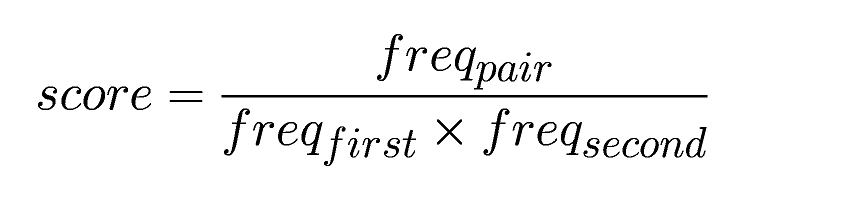

In [5]:
w1 = "hug"
w2 = "pug"
w3 = "pun"
w4 = "bun"
w5 = "hugs"


In [6]:
word_freq_1 = {
    "w1": 10,
    "w2": 5,
    "w3": 12,
    "w4": 4,
    "w5": 5
}

# "hug": 10번
# "pug": 5번
# "pun": 12번
# "bun": 4번
# "hugs": 5번

### Step 1.
* 형태소(글자, character)수준으로 분리
* 접두어가 아닌 이상 "##" 으로 모두 분리
* 각 형태소의 빈도 파악

In [7]:
def split_WPT(word):
    result = []
    word_list = list(word)
    for i in range(len(word_list)):
        if ( i == 0):
            result.append(word_list[i])
        else:
            result.append("##" + word_list[i])

    return result

In [8]:
w1 = split_WPT(w1)
w2 = split_WPT(w2)
w3 = split_WPT(w3)
w4 = split_WPT(w4)
w5 = split_WPT(w5)

print(f"w1 : {w1}")
print(f"w2 : {w2}")
print(f"w3 : {w3}")
print(f"w4 : {w4}")
print(f"w5 : {w5}")

# w1 : ['h', '##u', '##g']
# w2 : ['p', '##u', '##g']
# w3 : ['p', '##u', '##n']
# w4 : ['b', '##u', '##n']
# w5 : ['h', '##u', '##g', '##s']

w1 : ['h', '##u', '##g']
w2 : ['p', '##u', '##g']
w3 : ['p', '##u', '##n']
w4 : ['b', '##u', '##n']
w5 : ['h', '##u', '##g', '##s']


In [9]:
first_voca = list(set(w1 + w2 + w3 + w4 + w5))

print(first_voca)

['b', '##g', 'h', '##n', 'p', '##u', '##s']


In [10]:
word_freq_2 = {
    "h": word_freq_1["w1"] + word_freq_1["w5"],
    "##u": word_freq_1["w1"] + word_freq_1["w2"] + word_freq_1["w3"] + word_freq_1["w4"] + word_freq_1["w5"],
    "##g": word_freq_1["w1"] + word_freq_1["w2"] + word_freq_1["w5"],
    "p": word_freq_1["w2"] + word_freq_1["w3"],
    "##n": word_freq_1["w3"] + word_freq_1["w4"],
    "b": word_freq_1["w4"],
    "##s": word_freq_1["w5"]
}

# print(word_freq_2)
for key in word_freq_2.keys():
    print(f'"{key}" 의 freq: {word_freq_2[key]}')

"h" 의 freq: 15
"##u" 의 freq: 36
"##g" 의 freq: 20
"p" 의 freq: 17
"##n" 의 freq: 16
"b" 의 freq: 4
"##s" 의 freq: 5


### Step 2.
* 연속한 pair를 만들고 각각의 빈도를 탐색
* 특정 가중치 부여

In [11]:
w1_pair = ["hu", "##ug"]
w2_pair = ["pu", "##ug"]
w3_pair = ["pu", "##un"]
w4_pair = ["bu", "##un"]
w5_pair = ["hu", "##ug", "##gs"]

In [12]:
word_score = {
    "hu": (word_freq_1["w1"] + word_freq_1["w5"]) / (word_freq_2["h"] * word_freq_2["##u"]),
    "##ug": (word_freq_1["w1"] + word_freq_1["w2"] + word_freq_1["w5"]) / (word_freq_2["##u"] * word_freq_2["##g"]) ,
    "pu": (word_freq_1["w2"] + word_freq_1["w3"]) / (word_freq_2["p"] * word_freq_2["##u"]),
    "##un": (word_freq_1["w3"] + word_freq_1["w4"]) / (word_freq_2["##u"] * word_freq_2["##n"]),
    "bu": (word_freq_1["w4"]) / (word_freq_2["b"] * word_freq_2["##u"]),
    "##gs": (word_freq_1["w5"]) / (word_freq_2["##g"] * word_freq_2["##s"])
}


print(word_score)

# 'hu': 0.027777777777777776,
# '##ug': 0.027777777777777776,
# 'pu': 0.027777777777777776,
# '##un': 0.027777777777777776,
# 'bu': 0.027777777777777776,
# '##gs': 0.05

{'hu': 0.027777777777777776, '##ug': 0.027777777777777776, 'pu': 0.027777777777777776, '##un': 0.027777777777777776, 'bu': 0.027777777777777776, '##gs': 0.05}


### Step 3.
* Score 가 가장 높은 pair ("##gs") 만 merge
* Score 가 동일할 경우 사용자의 선택에 따라 고를 수 있다.

In [13]:
w1 = ['h', '##u', '##g']
w2 = ['p', '##u', '##g']
w3 = ['p', '##u', '##n']
w4 = ['b', '##u', '##n']
w5 = ['h', '##u', '##gs']

print(f"w1 : {w1}")
print(f"w2 : {w2}")
print(f"w3 : {w3}")
print(f"w4 : {w4}")
print(f"w5 : {w5}")

# w1 : ['h', '##u', '##g']
# w2 : ['p', '##u', '##g']
# w3 : ['p', '##u', '##n']
# w4 : ['b', '##u', '##n']
# w5 : ['h', '##u', '##gs']

w1 : ['h', '##u', '##g']
w2 : ['p', '##u', '##g']
w3 : ['p', '##u', '##n']
w4 : ['b', '##u', '##n']
w5 : ['h', '##u', '##gs']


### Step 4.
* 이 과정을 원하는 merge size 혹은 vocabulary size에 도달할 때 까지 수행
* merge size = 2 라고 가정

In [14]:
w1_second = ['h', '##u', '##g']
w2_second = ['p', '##u', '##g']
w3_second = ['p', '##u', '##n']
w4_second = ['b', '##u', '##n']
w5_second = ['h', '##u', '##gs']

print(f"w1_second : {w1_second}")
print(f"w2_second : {w2_second}")
print(f"w3_second : {w3_second}")
print(f"w4_second : {w4_second}")
print(f"w5_second : {w5_second}")

w1_second : ['h', '##u', '##g']
w2_second : ['p', '##u', '##g']
w3_second : ['p', '##u', '##n']
w4_second : ['b', '##u', '##n']
w5_second : ['h', '##u', '##gs']


In [15]:
word_second_freq = {
    "h": word_freq_1["w1"] + word_freq_1["w5"],
    "##u": word_freq_1["w1"] + word_freq_1["w2"] + word_freq_1["w3"] + word_freq_1["w4"] + word_freq_1["w5"],
    "##g": word_freq_1["w1"] + word_freq_1["w2"] + word_freq_1["w5"],
    "p": word_freq_1["w2"] + word_freq_1["w3"],
    "##n": word_freq_1["w3"] + word_freq_1["w4"],
    "b": word_freq_1["w4"],
    "##gs": word_freq_1["w5"]
}

for key in word_second_freq.keys():
    print(f'"{key}" 의 freq: {word_second_freq[key]}')

# "h" 의 freq: 15
# "##u" 의 freq: 36
# "##g" 의 freq: 20
# "p" 의 freq: 17
# "##n" 의 freq: 16
# "b" 의 freq: 4
# "##gs" 의 freq: 5

"h" 의 freq: 15
"##u" 의 freq: 36
"##g" 의 freq: 20
"p" 의 freq: 17
"##n" 의 freq: 16
"b" 의 freq: 4
"##gs" 의 freq: 5


In [16]:
w1_second_pair = ["hu", "##ug"]
w2_second_pair = ["pu", "##ug"]
w3_second_pair = ["pu", "##un"]
w4_second_pair = ["bu", "##un"]
w5_second_pair = ["hu", "##ugs"]

In [17]:
word_second_score = {
    "hu": (word_freq_1["w1"] + word_freq_1["w5"]) / (word_second_freq["h"] * word_second_freq["##u"]),
    "##ug": (word_freq_1["w1"] + word_freq_1["w2"]) / (word_second_freq["##u"] * word_second_freq["##g"]),
    "pu": (word_freq_1["w2"] + word_freq_1["w3"]) / (word_second_freq["p"] * word_second_freq["##u"]),
    "##un": (word_freq_1["w3"] + word_freq_1["w4"]) / (word_second_freq["##u"] * word_second_freq["##n"]),
    "bu": (word_freq_1["w4"]) / (word_second_freq["b"] * word_second_freq["##u"]),
    "##ugs": (word_freq_1["w5"]) / (word_second_freq["##u"] * word_second_freq["##gs"])
}

print(word_second_score)

# 'hu': 0.027777777777777776,
# '##ug': 0.020833333333333332,
# 'pu': 0.027777777777777776,
# '##un': 0.027777777777777776,
# 'bu': 0.027777777777777776,
# '##ugs': 0.027777777777777776

# 가장 Score 가 높고 사전순서상 가장 앞에 있는 "bu" Merge

{'hu': 0.027777777777777776, '##ug': 0.020833333333333332, 'pu': 0.027777777777777776, '##un': 0.027777777777777776, 'bu': 0.027777777777777776, '##ugs': 0.027777777777777776}


In [18]:
w1_last = ["h", "##u", "##g"]
w2_last = ["p", "##u", "##g"]
w3_last = ["p", "##u", "##n"]
w4_last = ["bu", "##n"]
w5_last = ["h", "##u", "##gs"]

last_voca = list(set(first_voca + w1_last + w2_last + w3_last + w4_last + w5_last))
print(last_voca)

['b', '##g', 'h', '##n', '##gs', 'p', 'bu', '##u', '##s']


### Setp 5.
* 적용
* 예시 문장
```
ex_sentence = "bugs hg hn puugs bun"
WPTed(ex_sentence) = ["bu", "##gs", "h", "##g", "h", "##n", "p", "##u", "##u", "##gs", "bu", "##n"]
```
* 주의사항
    * ##g, ##gs 처럼 포함되는 길이의 경우 긴 길이의 단어를 우선적으로 고려한다.
    * 단어사전을 길이를 기준으로 sort 한 이후에 for 문을 돌려 앞에서부터 고려하고 발견하면 멈추는 것을 사용하는 듯 하다

# Nerual Machine Translation of Rare Words with Subword Units 요약

### 2. Nerual Machine Translation
순환 신경망을 사용한 인코더-디코더 네트워크로 구현된다.
인코더는 입력 시퀀스를 읽고 hidden state를 계산하는 양방향 순환 신경망으로 구성되어 있으며, 디코더는 타깃 시퀀스를 예측하는 순환 신경망이다. 각 단어는 순환된 hidden state, 이전에 예측된 단어 및 context vector에 기반하여 예측된다. context vector는 annotation(주석벡터)의 가중합으로 계산되며, 각 주석의 가중치는 정렬 모델을 통해 계산된다. 이 정렬 모델은 단일층 피드포워드 신경망으로 이루어져 있으며, 네트워크의 나머지 부분과 함께 역전파를 통해 학습된다. 학습은 확률적 경사 하강법을 사용하여 병렬 말뭉치에서 수행되며, 번역에는 작은 빔 크기의 빔 검색이 사용된다.
- context vector는 번역 모델에서 중요한 문맥 정보를 담고 있는 벡터로, 인코더-디코더 모델의 핵심 구성 요소 중 하나이다.

- "주석 벡터"는 어텐션 메커니즘에서 디코더가 각각의 입력 단어에 부여하는 가중치를 나타내는 벡터를 말한다. 이 가중치는 디코더가 현재 생성하려는 출력 단어를 결정하는 데 얼마나 각 입력 단어를 중요하게 생각하는지를 나타낸다.

- "주석 벡터(Attention Vector)"는 어텐션 메커니즘이 계산하는 인코더의 주석 정보를 나타내며, 디코더가 현재 예측에 중점을 두어야 하는 부분을 반영한다.

-  "순환 숨겨진 상태"는 디코더에서 사용되며, 디코더가 현재 예측하려는 출력 단어를 생성하는 데 필요한 정보를 담고 있는 상태를 나타낸다.


### 3. Subword Translation
대명사, 동족어, 외래어, 합성어같은 단어들은 형태소나 음운 같은 작은 단위들로 쪼개어 번역할 수 있는데, 이를 통해 희귀한 단어를 적절한 단위로 분절하여 NMT가 새로운 단어를 번역하고 생성하는데 활용할 수 있다.

### 3-1. Related Work
- 형태론적으로 복잡한 단어(합성어)의 분절은 SMT에서 널리 사용되며 이를 위한 다양한 알고리즘이 연구 되었다.
단어를 고정된 크기의 형태소나 음운 단위로 쪼개는 방식을 사용하는 것은 단어 단위로 쪼갠 것과 차이가 크게 없기 때문에 subword 분절 방식을 사용하여 성능 증가시키고자 하였다.
- NMT는 구문 기반 방식과는 다르게 신경 모델은 학습 단어의 수를 최소화하는 것이 학습에 있어 더 큰 이점이 된다. 학습 단어의 수와 각 단어의 길이의 최적값을 찾기 위한 가장 간단한 방식으로는 세분화 되지 않은 단어들의 shortlist와 희귀 단어에 대한 subword를 동시에 사용하는 것이나 이를 대체하여 BPE 방식을 사용하도록 했다.

### 3-2. Byte Pair Encoding
바이트 페어 인코딩(BPE)은 가장 빈번한 두 문자 바이트를 반복적으로 하나의 사용되지 않는
- BPE는 단어 분할을 위해 적용되며, 빈번한 문자 또는 문자 시퀀스를 병합하는 대신에 빈도를 세어 가장 빈번한 쌍('A', 'B')의 각 발생을 새로운 심볼 'AB'로 대체한다.
- 각 병합 작업은 새로운 심볼을 생성하며, 이 심볼은 문자 n-그램을 나타냅니다. BPE는 단어의 압축을 위해 짧은 목록이 필요하지 않으며, 최종 심볼 어휘 크기는 초기 어휘 크기와 병합 작업의 수(후자는 알고리즘의 유일한 하이퍼파라미터)와 같다.
- 기타 압축 알고리즘(Huffman 인코딩 등)과 달리, BPE의 기호 시퀀스는 여전히 서브워드 단위로 해석 가능하며, 네트워크는 이러한 서브워드 단위를 기반으로 새로운 단어(학습 시점에서 보지 못한)를 번역하고 생성하는 데 일반화할 수 있다.
- BPE를 적용하는 방식
  - 원본 언어와 타겟 언어에 대해 각각 독립적으로 두 개의 인코딩을 학습하는 방식. 텍스트와 어휘 크기 측면에서 더 간결하며 학습 데이터 셋이 더 방대해진다.  
  소스언어와 타겟 언어간의 매핑을 학습하는 것이 어려워질 수 있음.
  - 원본과 타겟 언어의 합집합에 대해 인코딩을 학습하는 방식(공동 BPE). 소스와 타겟 언어 조각에 대한 일관성을 증가시킬 수 있음.

### 4. Evaluation
- 실험의 목표
  - 신경 기계 번역(NMT)에서 부분어 단위를 사용하여 드물고 이전에 보지 못한 단어들의 번역을 개선할 수 있는가?
  - 어휘 크기, 텍스트 크기 및 번역 품질 측면에서 어떤 부분어 단위 분할이 가장 성능이 좋은가?

### 4-1.
번역 품질 외에도 테스트의 주요 목표는 컴팩트한 고정 크기의 서브워드 어휘를 통해 개방적 어휘를 표현하고 효율적인 훈련 및 디코딩을 가능하게 하는 것입니다. 기본이 되는 segmentation은 character n-gram입니다.
* n-gram은 단어를 n개의 글자로 끊어서 이를 하나의 토큰으로 간주합니다. n이 1일 때는 유니그램(unigram), 2일 때는 바이그램(bigram), 3일 때는 트라이그램(trigram)이라고 명명하고 n이 4 이상일 때는 gram 앞에 그대로 숫자를 붙여서 명명합니다.
논문에서는 이러한 기술들이 어휘 크기를 어느 정도로만 감소시키고 알려지지 않은 단어 문제를 해결하지 못하며, 따라서 백오프 사전 없는 개방적 어휘 번역 목표에는 부적합하다고 주장합니다. BPE는 가변 길이의 단위의 유닛으로 작동하여 더 적은 토큰 수로 개방적 어휘의 목표를 충족시킵니다. Table1 표: BPE는 tokens(훈련 데이터 토큰 수)와 UNK(알려지지 않은 토큰 수)가 적음.


### 4-2.
영어→독일어 번역 결과는 표 2에 나와 있으며, 영어→러시아어 결과는 표 3에 표시되어 있습니다. 기준이 되는 WDict는 단어 수준 모델이며 백오프 사전(back-off dictionary)을 사용합니다. OOV(Out-Of-Vocabulary) 단어의 경우, 영어→독일어의 경우 알파벳이 같기 때문에 알려지지 않은 단어를 복사하는 것이 잘 작동합니다. 따라서 OOV 단어에 대한 유니그램 F1을 향상시키지만, 영어→러시아어의 경우 백오프 사전이 이름을 전사할 수 없기 때문에 향상이 더 작습니다. 알파벳이 다를 때(영어→러시아어), 서브워드 모델이 훨씬 더 효과적입니다. 유니그램 F1을 기준으로 특히 희귀한 단어에 대해 (EN→DE의 경우 36.8%→41.8%, EN→RU의 경우 26.5%→29.7%) 향상이 있습니다.

### 5-1.유니그램 정확도 (Unigram accuracy)
실험의 주요 주장은 단어 수준의 NMT 모델에서 희귀 및 알려지지 않은 단어의 번역이 부족하며, 서브워드 모델이 이러한 단어 유형의 번역을 개선한다는 것입니다.
백오프 사전이 생성하는 모든 OOV(Out-of-Vocabulary)는 일반적으로 이름과 같은 소스에서 복사된 단어입니다. 반면 서브워드 시스템은 합성어와 같이 새로운 단어를 생성하는 데 생산적으로 활용될 수 있습니다.
* 백오프 사전은 주로 소스에서 복사된 이름과 같은 단어를 생성하지만, 서브워드 시스템은 새로운 합성어 등을 형성할 수 있다는 점에 주목해야합니다.


### 5-2.
표 4는 영어에서 독일어로의 번역 예제 두 가지를 보여주며, 표 5는 영어에서 러시아어로의 번역 예제 두 가지를 보여줍니다. 기본 시스템은 모든 예제에서 단어를 삭제하거나, 번역되어야 할 소스 단어를 그대로 복사하는 등 실패를 보입니다. 반면 부분 단어 번역은 부분 단어 시스템이 과도하게 분리될 때 (research→Fo|rs|ch|un|g) 또는 분절이 형태소 경계와 일치하지 않을 때도 학습할 수 있는 능력을 보여줍니다. 시스템이 데이터 희소성 때문에 번역을 학습하지 못한 경우 일부 외래어에서 (예: asinine은 dumm으로 번역되어야 함) 잘못된 번역을 볼 수 있지만, 외래어기 때문에 그럴듯한 번역이 될 수 있습니다.
영어에서 러시아어로의 예제는 부분 단어 시스템이 음역을 할 수 있음을 보여줍니다. BPE-60k 시스템은 인코딩을 두 언어 쌍에 대해 일관되지 않게 처리합니다만, 합동 BPE 시스템 (BPE-J90k)의 분절은 일관된 결과를 보여줍니다.


### Conclusion
이 논문의 주요 기여는 신경 기계 번역 시스템이 rare and unseen words를 서브워드 유닛의 연속으로 나타내어 개방 어휘 번역이 가능하다는 것을 보여준 것입니다. BPE 분절 및 간단한 문자 바이그램 분절 모두에서 기준 모델 대비 성능 향상을 보여줍니다. 우리의 어휘 크기 선택은 어느 정도 임의적이며 주로 이전 연구와의 비교를 위한 것입니다. 미래 연구의 한 방향은 번역 작업에 대한 최적의 어휘 크기를 자동으로 학습하는 것이며, 이는 언어 쌍 및 교육 데이터 양에 따라 달라질 것으로 기대됩니다. 언어별 요인, 어휘 크기와 같은 상대적 효과는 다를 수 있겠지만, 논문에서는 부분 단어 분절이 대부분의 언어 쌍에 적합하며, 큰 NMT 어휘나 back-off 모델이 필요하지 않음을 보여줍니다.